# Week 9: A construction of the Poisson process


In this notebook we implement the discrete-time process that behaves like the Poisson process at larger scales. One can also see this notebook as a <b> construction </b> of the Poisson process.

Fix $T$ and $\lambda$ positive parameters and a very large integer $n$. We will see how we can naturally construct a Poisson process from a long random string of 0's and 1's.
We take a long string of size $T\times n$ of i.i.d. integers $(B_k)_k$ in $\{0,1\}$, with $\mathbb{P}(B_k = 1) = 1-\mathbb{P}(B_k = 0) = \frac{\lambda}{n}$. We then record the instants at which the $1$'s appear (note that this has small proba) and check that the counting process of the $1$'s when time-rescaled by $N$ looks like a Poisson process up to time $T$.

The string should look a bit like this:
\begin{equation}
0000000000000000000000000 \color{blue}{1} 00000000000000000000000000\color{blue}{1}00000000000000000000
\end{equation}

Denoting $S$ the time of appearance of the first $1$, we can see that
\begin{align}
    \mathbb{P}(S/n > t) &= \mathbb{P}(S > nt) \\
    &= \mathbb{P}(B_k = 0 \text{ for all }k\leq nt) \\
    &= (1-\frac{\lambda}{n})^{nt} \\
    &\to e^{-\lambda t} \text{ as } n \text{ goes to infinity}.
\end{align}

This suggests that when rescaling the time by $n$, the time of appearance of $1$ should have law Exp$(\lambda)$. And by independance of the bits in the string we see that any two consecutive $1$'s will be separated by an exponential random variable with parameter $\lambda$. <b>Thus the time-rescaled counting process of the ones should converge to the Poisson process.</b>

This is what we shall verify by simulating the process and evaluating different distributions associated with the process and seen in class.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

We will refer to the <b> time-rescaled </b>graph described above as the counting process $(C_t)_{0\leq t \leq T}$.
We check now that we indeed retrieve some properties of a Poisson process of rate $\lambda$ on it.


### 1) The law of $C_T$
For example, we first compute the empirical law of the counting process at time $T$ and compare it to the law of a Poisson process at time $T$. Recall that if $N$ is a poisson process of rate $\lambda$ then
\begin{equation}
    \mathbb{P}(N(T) = k) = e^{-\lambda T}\frac{(\lambda T )^k}{k!}.
\end{equation}
To plot the empirical distribution of $C_T$ we will simulate many times the above construction and plot the results in an histogram that we will compare to the theoretical distribution.

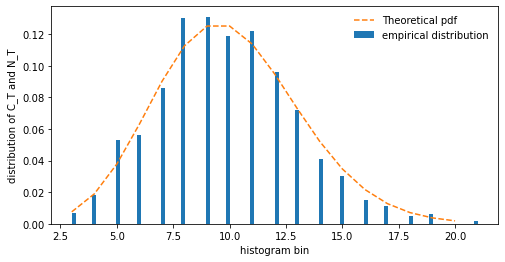

In [8]:
import scipy.stats as st
import math

# input data
N_sim = 10**3 # number of simulations
n = 10**4 
T = 50 
mu = 1/5 #remark: we call lambda mu here to avoid some conflict in python

C_T_array = np.zeros(N_sim)

for i in range(N_sim):
    S = np.random.choice(2, n*T, p=[1-mu/n,mu/n]) #create a new random string every time
    C_T_array[i] = np.sum(S)
    #C_T corresponds simply to the total number of ones in the string 
    #since this latter quantity is the number of jumps 
    #in the process C_t and thus its value at the final time t=T.

# Plot the empirical histogram and the theoretical pdf for T to compare
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("distribution of C_T and N_T")

# Compute and plot the histogram
weights = np.ones_like(C_T_array) / len(C_T_array) #this vector is used to normalize this histogram 
# so that the bars sum up to 1
ti, bins, pr = ax.hist(C_T_array, 100, weights = weights, label = 'empirical distribution')

# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-mu*T)*(mu*T)**k/math.factorial(k) #f is the (discrete) law of N_T
    
# Plot the theoretical pdf
ax.plot(range(a,b),f_T,'--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

So the graphs look alike even though there is some apparent variability in the results. Since $N$ and $n$ should both be very large to have interesting results you can check that decreasing one of these parameters leads to less accuracy in the prediction.

### 2) The distribution of the instant of the first jump in $(C_t)_{0\leq t \leq T}$
Another thing that we can look at is the time of the first jump, we should recover that it is approximately given by an exponential distribution with parameter $\lambda$. The larger $n$ and $N$ are, the better the approximation.

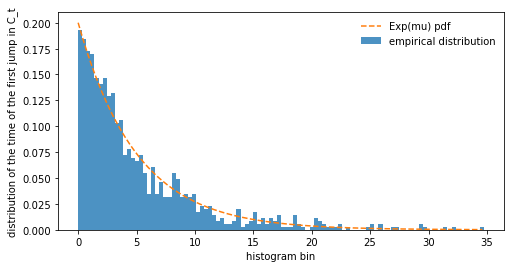

In [9]:
import scipy.stats as st
import math

# input data
N_sim = 10**3 # number of simulations
n = 10**4 
T = 70 
mu = 1/5 

C_T_array = np.zeros(N_sim)

for i in range(N_sim):
    S = np.random.choice(2, n*T, p=[1-mu/n,mu/n]) #create a new random string every time
    time_jumps = np.argwhere(S==1)
    C_T_array[i] = time_jumps[0]/n #Take the normalized time of the first jump 
    
    #It is possible though with very small probability that S contains no 1. In this case, the cell
    #will return an exception since time_jumps[0] will try to access the first element of an empty array.
    #If this is the case, you can just rerun the cell which should be fine since this has very small probability.
    #Otherwise you could modify the code to take into account these events into the description of the empirical distribution
    #of the first jump.

    
# Plot the empirical histogram and the theoretical pdf for T to compare
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("distribution of the time of the first jump in C_t")

# Definite the theoretical pdf
def pdf(x):
    return mu*np.exp(-mu*x)
# Compute and plot the histogram

ti, bins, pr = ax.hist(C_T_array, 100, density = True, label = 'empirical distribution',alpha = 0.8)
   
# Plot the theoretical pdf
x_axis = np.arange(0, bins[-1], 0.2)
ax.plot(x_axis, [pdf(x) for x in x_axis], '--', label='Exp(mu) pdf')
ax.legend(loc='best', frameon=False)
plt.show()

### 3) The distribution of the instant of later jumps in $(C_t)_{0\leq t \leq T}$

We now plot the empirical law of the instant of the $10$-th jump and compare with the theoretical distribution associated with the Poisson process (from class, what is it?) 

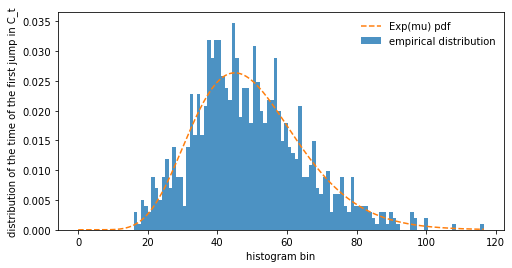

In [10]:
import scipy.stats as st
import math

# input data
N_sim = 10**3 # number of simulations
n = 10**4 
T = 200 
mu = 1/5 
n_jump = 10 #observe the 10-th jump

C_T_array = np.zeros(N_sim)

for i in range(N_sim):
    S = np.random.choice(2, n*T, p=[1-mu/n,mu/n]) #create a new random string every time
    time_jumps = np.argwhere(S==1)
    C_T_array[i] = time_jumps[n_jump-1]/n #Take the normalized time of the n_jump-th jump
    

    
# Plot the empirical histogram and the theoretical pdf 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("distribution of the time of the first jump in C_t")

# Definite the theoretical pdf
# The k-th jumps has law Gamma(k,mu)
def pdf(x):
    return mu*np.exp(-mu*x)*((mu*x)**(n_jump-1))/math.factorial(n_jump-1)

# Compute and plot the histogram
ti, bins, pr = ax.hist(C_T_array, 100, density = True, label = 'empirical distribution',alpha = 0.8)
   
# Plot the theoretical pdf
x_axis = np.arange(0, bins[-1], 0.2)
ax.plot(x_axis, [pdf(x) for x in x_axis], '--', label='Exp(mu) pdf')
ax.legend(loc='best', frameon=False)
plt.show()